In [350]:
import json
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [351]:
filename = 'ultimate_data_challenge.json'
with open(filename) as data_file:
    data = pd.DataFrame(json.load(data_file))
    
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [352]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [353]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [354]:
data.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64

In [355]:
logins.isnull().sum()

login_time    0
dtype: int64

In [356]:
len(data)

50000

In [357]:
avg_by_driver = np.mean(data['avg_rating_by_driver'])
avg_by_driver

4.778158195947439

In [358]:
data['avg_rating_by_driver']= data['avg_rating_by_driver'].fillna(int(avg_by_driver))
print(data.isnull().sum())

avg_dist                     0
avg_rating_by_driver         0
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


In [359]:
avg_of_driver = np.mean(data['avg_rating_by_driver'])
avg_of_driver

4.77502999999973

In [360]:
data['avg_rating_of_driver']= data['avg_rating_of_driver'].fillna(int(avg_of_driver))
print(data.isnull().sum())

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
dtype: int64


In [361]:
data['phone'] = data['phone'].fillna('Other')
print(data.isnull().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


In [362]:
sorted_cities = data['city'].sort_values()
sorted_cities.head()

49999    Astapor
13706    Astapor
13705    Astapor
33004    Astapor
33009    Astapor
Name: city, dtype: object

In [363]:
cities_counted = sorted_cities.value_counts()
cities_counted = cities_counted.rename_axis("city").reset_index(name = "count")

<BarContainer object of 3 artists>

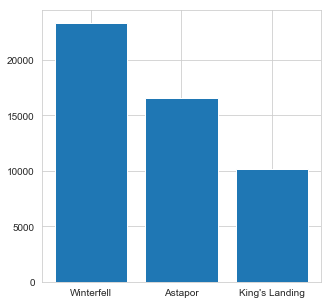

In [364]:
x = list(cities_counted['city'])
y = list(cities_counted['count'])

plt.figure(figsize = (5,5))
plt.bar(x,y)

In [365]:
logins_filename = 'logins.json'
with open(logins_filename) as data_file:
    logins = pd.DataFrame(json.load(data_file))

In [366]:
logins['login_time'] = pd.to_datetime(logins['login_time'])
logins.index = logins['login_time']
logins['count'] = 1

In [367]:
logins_15 = pd.DataFrame(logins['count'].resample('15Min').sum())

In [368]:
logins_15.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


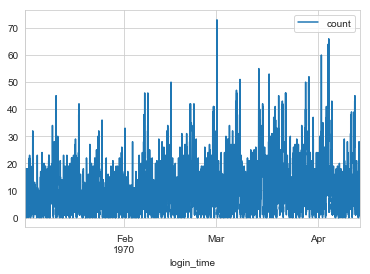

In [369]:
logins_15.plot(kind = "line")

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
        A key measure of success of this experienment is the increase of numbers used during the day or night. If both cities get more traffic during the day and the night, then you'd be able to tell if the vheicles have started using the toll bridge.

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    a. how you will implement the experiment
        The experiment I'd probably look into is through some statistical methods such frequentist inference which would allow me to find the frequency in which cars are used in both cities during the day and the night.
    b. what statistical test(s) you will conduct to verify the significance of the observation
        I'd use A/B testing to verify the singificance. This is so I can compare before and affer to see if there was any significant change in how much each city is being used before and after they implement the toll compensation.
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
        If there is a difference, then I think it would also be fair to see if the total amount of use increases as well. If it doesn't, then toll price isn't a factor in how much people use the service. But if there is some siginificant difference then it would be wise to keep the toll compensation in place. One thing though is I think that the amount people travel from one city to another will be better tellers of whether or not it was significant. That way before and after you can see if people were more willing to travel between cities and see that people are partnerned between.

Question 3

Question 1: perform exploratory analysis on the retained users.

In [370]:
month_trips = data['trips_in_first_30_days'].sort_values()
month_trips.head()

24999    0
24518    0
24515    0
24505    0
24503    0
Name: trips_in_first_30_days, dtype: int64

In [371]:
number_of_days = month_trips.value_counts()
number_of_days = number_of_days.rename_axis("trips_in_first_30_days").reset_index(name = "count_month")

<BarContainer object of 59 artists>

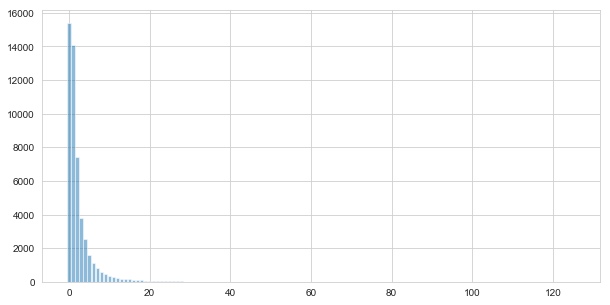

In [372]:
xm = list(number_of_days['trips_in_first_30_days'])
ym = list(number_of_days['count_month'])

plt.figure(figsize = (10,5))
plt.bar(xm, ym, alpha=0.5)

In [373]:
#if the date sign up + 30 is earlier than the last date they used it, then they weren't retained after 30 days

In [374]:
data['signup_date'] = pd.to_datetime(data['signup_date'])

In [375]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])

In [376]:
from datetime import date, timedelta


data["signup_date_30"] = data["signup_date"] + timedelta(days=30)
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_30
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-02-24
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-02-28
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-02-05
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-02-09
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-02-26


In [377]:
data['signup_date_30'] = pd.to_datetime(data['signup_date_30'])

In [378]:
#retained meaning it was used after 30 days
data['retained'] = ""

data.retained = data['signup_date_30'] < data['last_trip_date']

In [379]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,signup_date_30,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-02-24,True
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-02-28,True
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-02-05,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-02-09,True
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-02-26,True


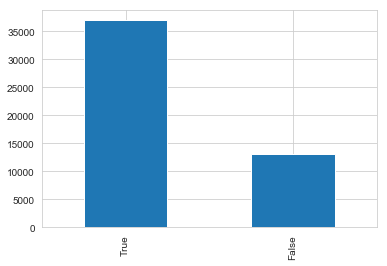

In [380]:
#count of true vs false. True is if the customer is retained. False if they have not been using it after 30 days
data.retained.value_counts().plot(kind = "bar")

In [381]:
#data.retained.plot()

In [382]:
data_no_return = data.copy()
data_return = data.copy()

In [383]:
# Get names of indexes for which column Age has value 30
indexNames = data_no_return[ data_no_return['trips_in_first_30_days'] != 0 ].index
 
# Delete these row indexes from dataFrame
data_no_return.drop(indexNames , inplace=True)

In [384]:
len(data_no_return)

15390

In [385]:
# Get names of indexes for which column Age has value 30
indexNames = data_return[data_return['trips_in_first_30_days'] == 0 ].index
 
# Delete these row indexes from dataFrame
data_return.drop(indexNames , inplace=True)

len(data_return)

34610

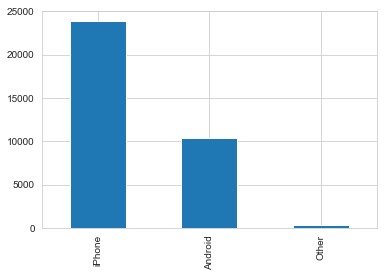

In [386]:
data_return.phone.value_counts().plot(kind = "bar")

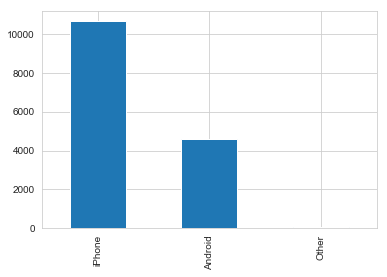

In [387]:
data_no_return.phone.value_counts().plot(kind = "bar")

In [388]:
print("Average distance of people who have used it within 30 days: ", data_return['avg_dist'].mean())
print("Average distance of people who have NOT used it within 30 days: ", data_no_return['avg_dist'].mean())

Average distance of people who have used it within 30 days:  5.529568043917937
Average distance of people who have NOT used it within 30 days:  6.397854450942169


In [389]:
print("Avg rating of driver 30days: ", data_return['avg_rating_of_driver'].mean())
print("Avg rating of driver NO 30days: ", data_no_return['avg_rating_of_driver'].mean())

Avg rating of driver 30days:  4.5150707887892745
Avg rating of driver NO 30days:  4.478589993502302


In [411]:
print("Avg rating of customer 30days: ", data_return['avg_rating_by_driver'].mean())
print("Avg rating of customer NO 30days: ", data_no_return['avg_rating_by_driver'].mean())

Avg rating of customer 30days:  4.769988442646459
Avg rating of customer NO 30days:  4.786367771280087


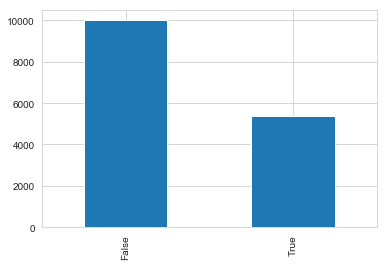

In [390]:
data_no_return.ultimate_black_user.value_counts().plot(kind = "bar")

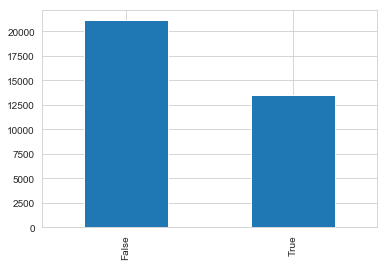

In [391]:
data_return.ultimate_black_user.value_counts().plot(kind = "bar")

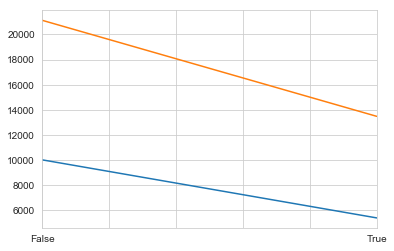

In [410]:
ax = data_no_return.ultimate_black_user.value_counts().plot()
data_return.ultimate_black_user.value_counts().plot(ax=ax)

#that doesn't look right, disregard this one

In [392]:
from sklearn.linear_model import LogisticRegression

In [393]:
feature_col = ["trips_in_first_30_days", "weekday_pct"]

X = data[feature_col]
y = data.trips_in_first_30_days

In [394]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [395]:
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.60


In [396]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4662    0    0 ...    0    0    0]
 [   0 4278    0 ...    0    0    0]
 [   0 2201    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


In [397]:
#0+11094 are correct predictions
#0+3906 are incorrect predictions

In [399]:
#predictions
predictions = lr.predict(X_test)


In [400]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4662
           1       0.55      1.00      0.71      4278
           2       0.00      0.00      0.00      2201
           3       0.00      0.00      0.00      1131
           4       0.00      0.00      0.00       711
           5       0.00      0.00      0.00       463
           6       0.00      0.00      0.00       342
           7       0.00      0.00      0.00       239
           8       0.00      0.00      0.00       189
           9       0.00      0.00      0.00       141
          10       0.00      0.00      0.00       101
          11       0.00      0.00      0.00        85
          12       0.00      0.00      0.00        55
          13       0.00      0.00      0.00        50
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00        56
          16       0.00      0.00      0.00        42
          17       0.00    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Logistic model was fairly accurate to predict prices for the future. The accuracy was about 74 which means it was more likely than random chance that the model was correctly predicting whether or not users would be retained.

In [412]:
from scipy.stats import ttest_ind

ttest_ind(X, y, equal_var=False)

Ttest_indResult(statistic=array([  0.        , 351.81974526]), pvalue=array([1., 0.]))

In [413]:
return_corr_pear = data_return.corr(method = 'pearson')
return_corr_pear

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
avg_dist,1.000000,0.088906,-0.013471,-0.077098,-0.099673,-0.153418,0.018227,0.095186,-0.162731
avg_rating_by_driver,0.088906,1.000000,0.093614,0.012954,0.022766,-0.040309,0.020882,0.019245,-0.047364
avg_rating_of_driver,-0.013471,0.093614,1.000000,-0.021905,-0.001314,0.067006,0.009933,0.022213,0.061505
avg_surge,-0.077098,0.012954,-0.021905,1.000000,0.792811,-0.008119,-0.076317,-0.109399,-0.017806
surge_pct,-0.099673,0.022766,-0.001314,0.792811,1.000000,0.001677,-0.102020,-0.147898,-0.001906
trips_in_first_30_days,-0.153418,-0.040309,0.067006,-0.008119,0.001677,1.000000,0.126496,0.073690,0.260962
ultimate_black_user,0.018227,0.020882,0.009933,-0.076317,-0.102020,0.126496,1.000000,0.022996,0.159358
weekday_pct,0.095186,0.019245,0.022213,-0.109399,-0.147898,0.073690,0.022996,1.000000,0.024804
retained,-0.162731,-0.047364,0.061505,-0.017806,-0.001906,0.260962,0.159358,0.024804,1.000000


In [414]:
no_return_corr_pear = data_no_return.corr(method = 'pearson')
no_return_corr_pear

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
avg_dist,1.000000,0.061044,-0.030788,-0.087601,-0.110632,NaN,0.067075,0.111141,NaN
avg_rating_by_driver,0.061044,1.000000,0.093810,-0.001089,0.009238,NaN,-0.002326,0.025326,NaN
avg_rating_of_driver,-0.030788,0.093810,1.000000,-0.024949,-0.000267,NaN,0.011993,0.016235,NaN
avg_surge,-0.087601,-0.001089,-0.024949,1.000000,0.795327,NaN,-0.085738,-0.111183,NaN
surge_pct,-0.110632,0.009238,-0.000267,0.795327,1.000000,NaN,-0.119022,-0.139863,NaN
trips_in_first_30_days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ultimate_black_user,0.067075,-0.002326,0.011993,-0.085738,-0.119022,NaN,1.000000,0.062607,NaN
weekday_pct,0.111141,0.025326,0.016235,-0.111183,-0.139863,NaN,0.062607,1.000000,NaN
retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


you have trips in the first 30 days (b/c the sign up date continues to update)

retained if they had at least had one trip the last 30 days.
Just use the last 30 days lol. (logistic regression good for binary butttt

..trips update feature columns, explore what the retained classes are then look to see groupings based on different variables. Like average distance between retained vs not retained users (4 or 5 charts)
...if u want to use dates, might need to extract things from the dates (not the datetime ex. month)
...type of phone
...distance

then predictive model: they're probably looking for more interpretation, what variables lead to higher retention rates. look at the statistical significance.

